In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [293]:
#import sklearn package details and data reader

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix

from pandas_datareader import data

import yfinance as yf #Do a pip install yfinance to install the package. Then you can import it
import googlefinance as gf

In [343]:
#Define the company dictionary to download and group

companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreens':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'Navistar':'NAV',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electric':'GE',
    'Symantec':'SYMC',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Mitsubishi':'MSBHY',
    'Sony':'SNE',
    'EXXON':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford Motors':'F',
    'Bank of America':'BAC',
    'Rogers':'RCI',
    'Bell Media':'BCE'
    }

companies_sort = sorted(companies_dict.items(), key = lambda x:x[1]) #Sort by index 1 i.e. the tickers
print(companies_dict)
print('\n')
print(companies_sort)
companies_sort1 = pd.DataFrame(companies_sort)

print('\n')
print(companies_sort1)

{'Amazon': 'AMZN', 'Apple': 'AAPL', 'Walgreens': 'WBA', 'Northrop Grumman': 'NOC', 'Boeing': 'BA', 'Lockheed Martin': 'LMT', 'McDonalds': 'MCD', 'Intel': 'INTC', 'Navistar': 'NAV', 'IBM': 'IBM', 'Texas Instruments': 'TXN', 'MasterCard': 'MA', 'Microsoft': 'MSFT', 'General Electric': 'GE', 'Symantec': 'SYMC', 'American Express': 'AXP', 'Pepsi': 'PEP', 'Coca Cola': 'KO', 'Johnson & Johnson': 'JNJ', 'Toyota': 'TM', 'Honda': 'HMC', 'Mitsubishi': 'MSBHY', 'Sony': 'SNE', 'EXXON': 'XOM', 'Chevron': 'CVX', 'Valero Energy': 'VLO', 'Ford Motors': 'F', 'Bank of America': 'BAC', 'Rogers': 'RCI', 'Bell Media': 'BCE'}


[('Apple', 'AAPL'), ('Amazon', 'AMZN'), ('American Express', 'AXP'), ('Boeing', 'BA'), ('Bank of America', 'BAC'), ('Bell Media', 'BCE'), ('Chevron', 'CVX'), ('Ford Motors', 'F'), ('General Electric', 'GE'), ('Honda', 'HMC'), ('IBM', 'IBM'), ('Intel', 'INTC'), ('Johnson & Johnson', 'JNJ'), ('Coca Cola', 'KO'), ('Lockheed Martin', 'LMT'), ('MasterCard', 'MA'), ('McDonalds', 'MCD'), ('

In [344]:
# Use pandas_reader.data.DataReader to load the desired stock data

#Define the data source
data_source = 'yahoo'

#Define start and end dates
start_date = '2015-01-01'
end_date = '2017-12-31'

#load the stock data
panel_data = data.DataReader(list(companies_dict.values()), data_source, start_date, end_date)
#panel_data = companies_dict.values().history(start = 'start_date', end = 'end_date',interval = '1m')
#print(companies_dict.values())

panel_data.head()

C:\Users\bishnu.mohanty\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'SYMC', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\bishnu.mohanty\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'MSBHY', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Attributes   Adj Close                                                \
Symbols           AMZN       AAPL        WBA         NOC          BA   
Date                                                                   
2015-01-02  308.519989  24.898552  65.250008  132.902039  113.657227   
2015-01-05  302.190002  24.197117  63.962185  130.098083  112.870056   
2015-01-06  295.290009  24.199400  64.125320  130.814941  111.540627   
2015-01-07  298.420013  24.538729  65.765137  134.952805  113.272369   
2015-01-08  300.459991  25.481558  66.580788  138.083435  115.275284   

Attributes                                                           ...  \
Symbols            LMT        MCD       INTC        NAV         IBM  ...   
Date                                                                 ...   
2015-01-02  164.792603  79.218002  30.858051  34.160000  126.239502  ...   
2015-01-05  161.365631  78.343079  30.510092  33.099998  124.253128  ...   
2015-01-06  160.606934  78.487503  29.941477  32.299999  121.573479  ...   
2015-01-07  162.678482  79.855064  30.569496  32.919998  120.778923  ...   
2015-01-08  166.344131  80.152367  31.138117  31.809999  123.404022  ...   

Attributes     Volume                                                 \
Symbols           SNE         XOM         CVX        VLO           F   
Date                                                                   
2015-01-02  1229900.0  10220400.0   5898800.0  5897000.0  24777900.0   
2015-01-05  1083100.0  18502400.0  11758100.0  7732700.0  44079700.0   
2015-01-06  2209100.0  16670700.0  11591600.0  8586800.0  32981600.0   
2015-01-07  2486300.0  13590700.0  10353800.0  8825800.0  26065300.0   
2015-01-08  1296500.0  15487500.0   8650800.0  8941700.0  33943400.0   

Attributes                                               
Symbols             BAC       RCI        BCE SYMC MSBHY  
Date                                                     
2015-01-02   48951100.0  249500.0   687200.0  NaN   NaN  
2015-01-05  105605500.0  385500.0   878400.0  NaN   NaN  
2015-01-06  144912400.0  391500.0  2178500.0  NaN   NaN  
2015-01-07  104603800.0  365700.0  2176700.0  NaN   NaN  
2015-01-08   73388500.0  202200.0  1019100.0  NaN   NaN  

[5 rows x 180 columns]

In [345]:
panel_data.shape

print(panel_data.axes)
print('\n')
print(panel_data.columns)

[DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=755, freq=None), MultiIndex([('Adj Close',  'AMZN'),
            ('Adj Close',  'AAPL'),
            ('Adj Close',   'WBA'),
            ('Adj Close',   'NOC'),
            ('Adj Close',    'BA'),
            ('Adj Close',   'LMT'),
            ('Adj Close',   'MCD'),
            ('Adj Close',  'INTC'),
            ('Adj Close',   'NAV'),
            ('Adj Close',   'IBM'),
            ...
            (   'Volume',   'SNE'),
            (   'Volume',   'XOM'),
            (   'Volume',   'CVX'),
            (   'Volume',   'VLO'),
            ( 

In [346]:
# Find stock open and close data values
panel_data = pd.DataFrame(panel_data)
stock_close = panel_data['Close']
stock_open = panel_data['Open']

In [347]:
stock_open

Symbols,AMZN,AAPL,WBA,NOC,BA,LMT,MCD,INTC,NAV,IBM,...,SNE,XOM,CVX,VLO,F,BAC,RCI,BCE,SYMC,MSBHY
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,312.579987,27.847500,76.110001,148.289993,131.070007,192.100006,94.129997,36.669998,33.820000,161.309998,...,20.469999,92.250000,111.629997,49.549999,15.59,17.990000,38.709999,45.689999,NaN,NaN
2015-01-05,307.010010,27.072500,75.080002,145.449997,129.660004,192.899994,93.300003,36.200001,33.849998,161.270004,...,20.450001,92.099998,110.959999,49.840000,15.12,17.790001,38.730000,45.470001,NaN,NaN
2015-01-06,302.239990,26.635000,75.970001,143.460007,129.050003,189.619995,92.669998,36.080002,32.759998,159.669998,...,20.459999,90.239998,107.870003,48.220001,14.88,17.420000,37.959999,45.029999,NaN,NaN
2015-01-07,297.500000,26.799999,75.050003,145.050003,128.740005,189.320007,93.260002,35.639999,32.540001,157.199997,...,21.590000,90.650002,109.250000,48.070000,14.78,17.139999,38.299999,45.450001,NaN,NaN
2015-01-08,300.320007,27.307501,77.300003,149.839996,130.600006,190.899994,94.230003,36.369999,33.139999,156.240005,...,21.530001,91.250000,109.190002,48.090000,15.40,17.160000,38.560001,46.099998,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,1172.079956,43.669998,73.110001,305.769989,296.329987,318.299988,171.820007,46.330002,44.820000,151.820007,...,45.730000,83.879997,124.849998,91.029999,12.66,29.980000,50.320000,47.110001,NaN,NaN
2017-12-26,1168.359985,42.700001,72.989998,304.420013,295.540009,318.359985,171.089996,46.279999,44.599998,152.509995,...,45.349998,83.959999,125.230003,91.250000,12.57,29.740000,50.209999,47.500000,NaN,NaN
2017-12-27,1179.910034,42.525002,73.330002,304.649994,296.410004,319.670013,171.330002,46.110001,44.000000,152.949997,...,45.200001,83.989998,125.959999,91.820000,12.57,29.660000,50.650002,47.610001,NaN,NaN


In [348]:
#Lets calculate daily stock movement

stock_move = stock_close - stock_open

In [349]:
stock_move

Symbols,AMZN,AAPL,WBA,NOC,BA,LMT,MCD,INTC,NAV,IBM,...,SNE,XOM,CVX,VLO,F,BAC,RCI,BCE,SYMC,MSBHY
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,-4.059998,-0.514999,-0.110001,-1.829987,-1.120010,1.209991,-0.869995,-0.309998,0.340000,0.750000,...,0.090000,0.580002,0.950005,0.790001,-0.230000,-0.090000,0.080002,0.030003,NaN,NaN
2015-01-05,-4.820007,-0.510000,-0.580002,-2.080002,-0.610001,-3.610001,-1.070000,-0.250000,-0.750000,-1.760010,...,-0.190001,-1.809998,-2.879997,-1.570000,-0.360000,-0.410002,-0.720001,-0.310001,NaN,NaN
2015-01-06,-6.949982,-0.070000,-1.279999,0.699997,-1.520004,-1.220001,-0.269997,-0.800003,-0.459999,-3.599991,...,-0.209999,-0.430000,0.159996,-0.540001,-0.260000,-0.559999,0.190002,0.220001,NaN,NaN
2015-01-07,0.920013,0.137501,1.549995,3.669998,0.769989,1.509995,0.750000,0.380001,0.379997,-2.149994,...,-0.059999,0.070000,-1.309998,-0.759998,0.260000,-0.199999,0.040001,0.559998,NaN,NaN
2015-01-08,0.139984,0.664999,0.250000,2.330002,1.199997,4.230011,0.129997,0.320000,-1.330000,2.179993,...,0.029999,0.980003,1.220001,1.930000,0.020000,0.130001,0.169998,0.220001,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,-3.719971,0.082500,-0.400002,-1.989990,-1.229980,-0.269989,-0.400009,0.369999,-0.209999,0.679993,...,-0.049999,0.090004,0.130005,0.099998,-0.080000,-0.100000,0.110001,0.360001,NaN,NaN
2017-12-26,8.400024,-0.057499,0.310005,-0.580017,-0.180023,0.150024,0.199997,-0.199997,-0.609997,0.320007,...,-0.139999,0.020004,0.750000,0.610001,0.030001,0.040001,0.360001,0.110001,NaN,NaN
2017-12-27,2.349976,0.125000,-0.470001,1.510010,-0.790009,-0.230011,1.339996,0.000000,-0.560001,0.180008,...,0.059998,-0.089996,-0.409996,0.320000,-0.070000,0.070000,0.029999,-0.139999,NaN,NaN


In [350]:
stock_moveT = stock_move.T
print(stock_moveT.head())
print(stock_moveT.shape)

Date     2015-01-02  2015-01-05  2015-01-06  2015-01-07  2015-01-08  \
Symbols                                                               
AMZN      -4.059998   -4.820007   -6.949982    0.920013    0.139984   
AAPL      -0.514999   -0.510000   -0.070000    0.137501    0.664999   
WBA       -0.110001   -0.580002   -1.279999    1.549995    0.250000   
NOC       -1.829987   -2.080002    0.699997    3.669998    2.330002   
BA        -1.120010   -0.610001   -1.520004    0.769989    1.199997   

Date     2015-01-09  2015-01-12  2015-01-13  2015-01-14  2015-01-15  ...  \
Symbols                                                              ...   
AMZN      -4.550018   -6.149994   -2.740021    1.339996   -7.049988  ...   
AAPL      -0.164999   -0.837500   -0.302500    0.190001   -0.795000  ...   
WBA       -1.639999   -0.100006    0.060005    0.049995   -1.139999  ...   
NOC        0.290009   -0.819992   -1.029999    1.399994   -0.290009  ...   
BA        -0.050003   -1.370010   -0.830002   

In [351]:
#Sorting stock_moveT by company ticker

stock_moveT.sort_index(axis =0, inplace = True)
stock_moveT

Date,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,...,2017-12-15,2017-12-18,2017-12-19,2017-12-20,2017-12-21,2017-12-22,2017-12-26,2017-12-27,2017-12-28,2017-12-29
Symbols,,,,,,,,,,,,,,,,,,,,,
AAPL,-0.514999,-0.510000,-0.070000,0.137501,0.664999,-0.164999,-0.837500,-0.302500,0.190001,-0.795000,...,0.084999,0.384998,-0.122501,-0.129997,0.209999,0.082500,-0.057499,0.125000,0.020000,-0.322502
AMZN,-4.059998,-4.820007,-6.949982,0.920013,0.139984,-4.550018,-6.149994,-2.740021,1.339996,-7.049988,...,0.109985,3.209961,-1.770020,-12.880005,-1.140015,-3.719971,8.400024,2.349976,-2.900024,-12.880005
AXP,-0.150002,-1.900002,-2.160004,-0.709999,0.139999,-1.160004,-1.000000,-1.039993,-0.370003,-1.620003,...,0.739998,0.489998,-1.059998,-1.199997,-0.550003,0.269997,-0.230003,0.229996,0.059998,-0.690002
BA,-1.120010,-0.610001,-1.520004,0.769989,1.199997,-0.050003,-1.370010,-0.830002,1.350006,-0.110001,...,-1.929993,0.140015,0.750000,-0.800018,-3.019989,-1.229980,-0.180023,-0.790009,0.540009,-2.029999
BAC,-0.090000,-0.410002,-0.559999,-0.199999,0.130001,-0.400000,-0.340000,-0.369999,0.040001,-0.390000,...,0.130001,0.189999,-0.150000,-0.280001,0.230000,-0.100000,0.040001,0.070000,0.070000,-0.330000
BCE,0.030003,-0.310001,0.220001,0.559998,0.220001,-0.330002,0.090000,0.220001,0.080002,-0.329998,...,-0.700001,-0.099998,0.090000,-0.669998,0.090000,0.360001,0.110001,-0.139999,0.139999,0.149998
CVX,0.950005,-2.879997,0.159996,-1.309998,1.220001,-1.930000,-1.590004,-2.720001,0.700005,-1.740005,...,-0.709999,-0.220001,-0.480003,0.610001,3.430000,0.130005,0.750000,-0.409996,-0.110001,-0.169998
F,-0.230000,-0.360000,-0.260000,0.260000,0.020000,-0.250000,-0.090000,-0.170000,0.040000,-0.260000,...,0.070000,0.000000,-0.020000,0.000000,-0.110000,-0.080000,0.030001,-0.070000,0.100000,-0.090000
GE,-0.269232,-0.394230,-0.375000,-0.125000,0.048077,-0.471155,-0.086540,-0.384615,0.125000,-0.269232,...,0.038462,-0.105768,-0.173077,-0.173077,0.009615,-0.009615,-0.019232,-0.076923,0.009617,0.173079


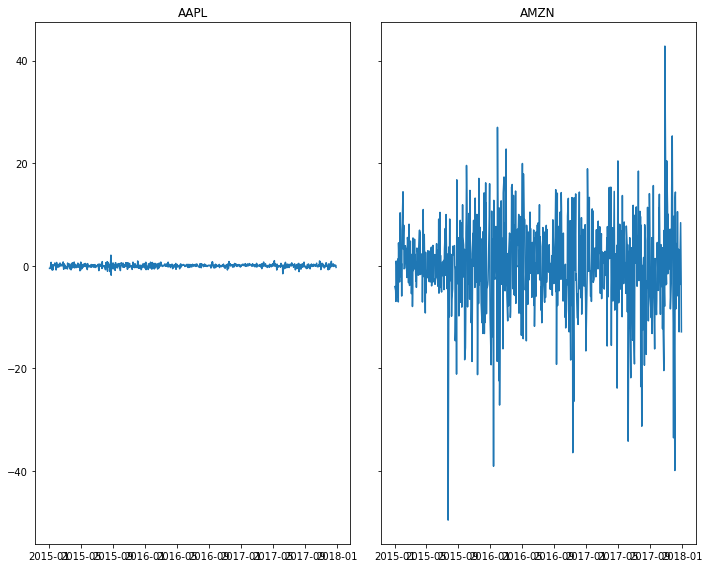

In [352]:
# Performing some data visualization (Exploratory Data Analysis)
plt.clf
fig, axes = plt.subplots(1,2, sharey = True, figsize=(10, 8)) #sharey helps both plots share the same y-axis. similarly sharex shares x axis

axes[0].plot(stock_moveT.iloc[0,:])
axes[0].set_title(stock_moveT.index[0])

axes[1].plot(stock_moveT.iloc[1,:])
axes[1].set_title(stock_moveT.index[1])

plt.tight_layout()

In [353]:
#Dropping the two rows of data where we saw NaN before
stock_moveT.dropna(inplace = True)
stock_moveT

Date,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,...,2017-12-15,2017-12-18,2017-12-19,2017-12-20,2017-12-21,2017-12-22,2017-12-26,2017-12-27,2017-12-28,2017-12-29
Symbols,,,,,,,,,,,,,,,,,,,,,
AAPL,-0.514999,-0.510000,-0.070000,0.137501,0.664999,-0.164999,-0.837500,-0.302500,0.190001,-0.795000,...,0.084999,0.384998,-0.122501,-0.129997,0.209999,0.082500,-0.057499,0.125000,0.020000,-0.322502
AMZN,-4.059998,-4.820007,-6.949982,0.920013,0.139984,-4.550018,-6.149994,-2.740021,1.339996,-7.049988,...,0.109985,3.209961,-1.770020,-12.880005,-1.140015,-3.719971,8.400024,2.349976,-2.900024,-12.880005
AXP,-0.150002,-1.900002,-2.160004,-0.709999,0.139999,-1.160004,-1.000000,-1.039993,-0.370003,-1.620003,...,0.739998,0.489998,-1.059998,-1.199997,-0.550003,0.269997,-0.230003,0.229996,0.059998,-0.690002
BA,-1.120010,-0.610001,-1.520004,0.769989,1.199997,-0.050003,-1.370010,-0.830002,1.350006,-0.110001,...,-1.929993,0.140015,0.750000,-0.800018,-3.019989,-1.229980,-0.180023,-0.790009,0.540009,-2.029999
BAC,-0.090000,-0.410002,-0.559999,-0.199999,0.130001,-0.400000,-0.340000,-0.369999,0.040001,-0.390000,...,0.130001,0.189999,-0.150000,-0.280001,0.230000,-0.100000,0.040001,0.070000,0.070000,-0.330000
BCE,0.030003,-0.310001,0.220001,0.559998,0.220001,-0.330002,0.090000,0.220001,0.080002,-0.329998,...,-0.700001,-0.099998,0.090000,-0.669998,0.090000,0.360001,0.110001,-0.139999,0.139999,0.149998
CVX,0.950005,-2.879997,0.159996,-1.309998,1.220001,-1.930000,-1.590004,-2.720001,0.700005,-1.740005,...,-0.709999,-0.220001,-0.480003,0.610001,3.430000,0.130005,0.750000,-0.409996,-0.110001,-0.169998
F,-0.230000,-0.360000,-0.260000,0.260000,0.020000,-0.250000,-0.090000,-0.170000,0.040000,-0.260000,...,0.070000,0.000000,-0.020000,0.000000,-0.110000,-0.080000,0.030001,-0.070000,0.100000,-0.090000
GE,-0.269232,-0.394230,-0.375000,-0.125000,0.048077,-0.471155,-0.086540,-0.384615,0.125000,-0.269232,...,0.038462,-0.105768,-0.173077,-0.173077,0.009615,-0.009615,-0.019232,-0.076923,0.009617,0.173079


In [354]:
#Bcz the movement values are dependent on the stock price, we need to normalize them first so we can then group
#the companies by their variance in stock price. Otherwise, the model will group by stock size and not by variance

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(stock_moveT)
scaled_data = normalizer.transform(stock_moveT)

In [355]:
# Now we can see our dataset after being normalized has a mean around 0
print(scaled_data.min())
print(scaled_data.max())
print(scaled_data.mean())
#plt.hist(scaled_data, bins = 50, title = "Histogram")
#plt.show()

-0.25991072682969973
0.2604577827945872
0.0009641912317146359


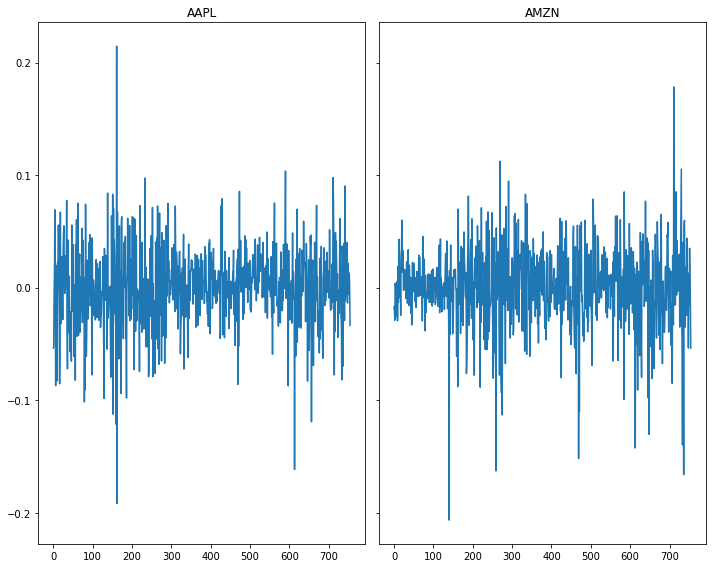

In [356]:
# Performing data visualization again on the scaled_data to see if the variance is now normalized
plt.clf
fig, axes = plt.subplots(1,2, sharey = True, figsize=(10, 8)) #sharey helps both plots share the same y-axis. similarly sharex shares x axis

axes[0].plot(scaled_data[0])
axes[0].set_title(stock_moveT.index[0])

axes[1].plot(scaled_data[1])
axes[1].set_title(stock_moveT.index[1])

plt.tight_layout()

In [357]:
# Modelling KMeans (say with 10 clusters)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(scaled_data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [358]:
print(kmeans.cluster_centers_)
print('\n')
print(kmeans.labels_) #gives the cluster labels of the 26 companies considered in our model

[[-0.0126673  -0.0409136  -0.01428797 ...  0.00265576  0.0279459
  -0.03114617]
 [-0.01940217 -0.0331008  -0.02646327 ...  0.01466963 -0.00820648
  -0.03027018]
 [-0.02095764 -0.06598398 -0.06621027 ...  0.00178602  0.00365858
  -0.03526597]
 ...
 [-0.01727103 -0.03867982 -0.0612642  ...  0.00591008  0.00134832
  -0.0165966 ]
 [ 0.0283251  -0.05629159 -0.01936147 ...  0.01147344 -0.00322678
  -0.02796648]
 [-0.00393916 -0.02077006 -0.04583718 ... -0.0168309   0.00214881
  -0.00035791]]


[7 1 2 0 2 4 3 2 2 2 7 7 5 5 0 1 1 1 6 0 5 4 2 2 7 8 9 3]


In [359]:
kmeans.inertia_  #Lower the value, better is it as it means there is low spread

9.393841836953913

In [360]:

# To read it a little better, lets add company name to the output also


x = companies_sort1.merge(stock_moveT, how = 'inner', right_on = stock_moveT.index, left_on = companies_sort1[1]) 
x[0]

0                 Apple
1                Amazon
2      American Express
3                Boeing
4       Bank of America
5            Bell Media
6               Chevron
7           Ford Motors
8      General Electric
9                 Honda
10                  IBM
11                Intel
12    Johnson & Johnson
13            Coca Cola
14      Lockheed Martin
15           MasterCard
16            McDonalds
17            Microsoft
18             Navistar
19     Northrop Grumman
20                Pepsi
21               Rogers
22                 Sony
23               Toyota
24    Texas Instruments
25        Valero Energy
26            Walgreens
27                EXXON
Name: 0, dtype: object

In [361]:
# To read it a little better
df = pd.DataFrame({'labels':kmeans.labels_,'companies':list(stock_moveT.index),'Title':x[0]})
print(df.sort_values('labels'))

    labels companies              Title
19       0       NOC   Northrop Grumman
3        0        BA             Boeing
14       0       LMT    Lockheed Martin
1        1      AMZN             Amazon
16       1       MCD          McDonalds
15       1        MA         MasterCard
17       1      MSFT          Microsoft
22       2       SNE               Sony
23       2        TM             Toyota
9        2       HMC              Honda
7        2         F        Ford Motors
4        2       BAC    Bank of America
2        2       AXP   American Express
8        2        GE   General Electric
6        3       CVX            Chevron
27       3       XOM              EXXON
21       4       RCI             Rogers
5        4       BCE         Bell Media
20       5       PEP              Pepsi
13       5        KO          Coca Cola
12       5       JNJ  Johnson & Johnson
18       6       NAV           Navistar
11       7      INTC              Intel
10       7       IBM                IBM


In [362]:
# LETS APPLY PCA ON THE ABOVE DATA SET TO REDUCE DIMENSIONALITY TO 2 SO WE CAN GRAPHICALLY REPRESENT IT
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)
X_pca = pca.transform(scaled_data)

print(X_pca.shape)
print(scaled_data.shape)

(28, 2)
(28, 755)


In [366]:
#NOW LETS RUN KMEANS ON THE DIMENSIONALLY REDUCED DATA SET
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_pca)
kmeans.inertia_

0.5481361023531638

In [367]:
kmeans.labels_

array([0, 0, 1, 4, 1, 2, 3, 1, 4, 4, 4, 4, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2,
       4, 4, 0, 4, 0, 3])

In [368]:
df = pd.DataFrame({'labels':kmeans.labels_,'companies':list(stock_moveT.index),'Title':x[0]})
print(df.sort_values('labels'))

    labels companies              Title
0        0      AAPL              Apple
1        0      AMZN             Amazon
24       0       TXN  Texas Instruments
19       0       NOC   Northrop Grumman
17       0      MSFT          Microsoft
16       0       MCD          McDonalds
15       0        MA         MasterCard
26       0       WBA          Walgreens
14       0       LMT    Lockheed Martin
2        1       AXP   American Express
4        1       BAC    Bank of America
7        1         F        Ford Motors
18       1       NAV           Navistar
21       2       RCI             Rogers
20       2       PEP              Pepsi
13       2        KO          Coca Cola
5        2       BCE         Bell Media
12       2       JNJ  Johnson & Johnson
6        3       CVX            Chevron
27       3       XOM              EXXON
11       4      INTC              Intel
10       4       IBM                IBM
9        4       HMC              Honda
8        4        GE   General Electric


Text(0, 0.5, '2nd Component')

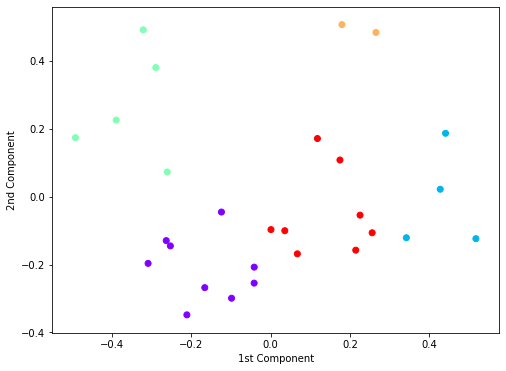

In [369]:
#Lets plot
plt.figure(figsize = (8,6))
plt.scatter(X_pca[:,0],X_pca[:,1], c= kmeans.labels_, cmap = 'rainbow')
plt.xlabel('1st Component')
plt.ylabel('2nd Component')